# Oppgave 6 - Alexandria slår tilbake

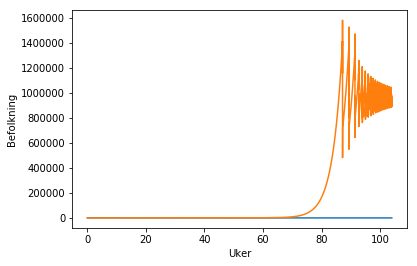

In [40]:
from pylab import*
#Tid og steg

N = 10000    #Antall ganger løkka skal kjøre
tid = 104 #Antall tid i uker
dt = tid/N    #Antall uker pr gang løkka kjører


#Konstanter

a = 0.02 #Fødselrate
b = 1200 #Bæereevnen
d =  0.017 #Dødsrate
p = 0.269 #Innvandringsendringskonstanten
g = 0 #Antall mennesker drept av zombier hver uke
k = 0 #Antall zombier drept av mennesker hver uke
f = 0.4 #Prosent av mennekser drept som blir til zombier
h = 0.0002 #Zombiemøtedrapskonstanten
j = 0.00002 #Menneskemøtedrapskonstant
t0 = 0 #Startstid
c0 = 500 #Befolkningen til å starte med
z0 = 45 #Antall zombier til å starte med


#Matriser

c = zeros(N)   #Matrise for befolkningen
cder = zeros(N)  #Matrise for endring i befolkningen
t = zeros(N)    #Matrise for tid
z = zeros(N)    #Matrise for antall zombier
zder = zeros(N) #Matrise for endring av zombier

#Initialbetingelser 

c[0] = c0
t[0] = t0
z[0] = z0 


#Eulers Metode

for i in range(N-1):
    if t[i]<52:
        u = 15-(t[i]*p) #Innvandring
    else: 
        u = 1
    g = c[i]*z[i]*h  #Formel for antall mennesker drept
    k = z[i]*c[i]*j #Formel for antall zombier drept
    if c[i] < b:
        cder[i] = (a*c[i])*(1-(c[i]/b))+u - d*c[i] - g
    else:   
        cder[i] = (a*c[i])*(1-(c[i]/b)) - d*c[i] - g
    zder[i] = (f*z[i]) - k*z[i]
    c[i+1] = c[i] + cder[i]*dt
    z[i+1] = z[i] + g*f + zder[i]*dt - k
    t[i+1] = t[i]+dt
    
#Plotting

plot(t,c)
plot(t,z)
xlabel("Uker")
ylabel("Befolkning")
show()